# 21기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [7]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import *
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.spatial as sp 

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

## 0. 데이터 불러오기

In [8]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [9]:
df.shape

(200, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [14]:
# Gender one_hot encoding

encoder = OneHotEncoder().fit(df[['Gender']])
encoder.get_feature_names_out(['Gender'])

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [16]:
endcoded_data = pd.DataFrame(encoder.transform(df[['Gender']]).toarray(), index = df.index,
                             columns = encoder.get_feature_names_out(['Gender'])) 

data = pd.concat([df, endcoded_data], sort = False, axis = 1).drop(['Gender'], axis = 1)
data  

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0.0,1.0
2,21,15,81,0.0,1.0
3,20,16,6,1.0,0.0
4,23,16,77,1.0,0.0
5,31,17,40,1.0,0.0
...,...,...,...,...,...
196,35,120,79,1.0,0.0
197,45,126,28,1.0,0.0
198,32,126,74,0.0,1.0


## 2. Clustering

### 스케일링 진행

In [17]:
data_1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data_1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [18]:
scaler = StandardScaler()
scaler.fit(data_1)
data_1 = pd.DataFrame(scaler.transform(data_1))     # 스케일링한 데이터를 다시 DataFrame으로
data_1

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### k-means 진행

#### 초깃값 3으로 설정

In [22]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_1)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_1)


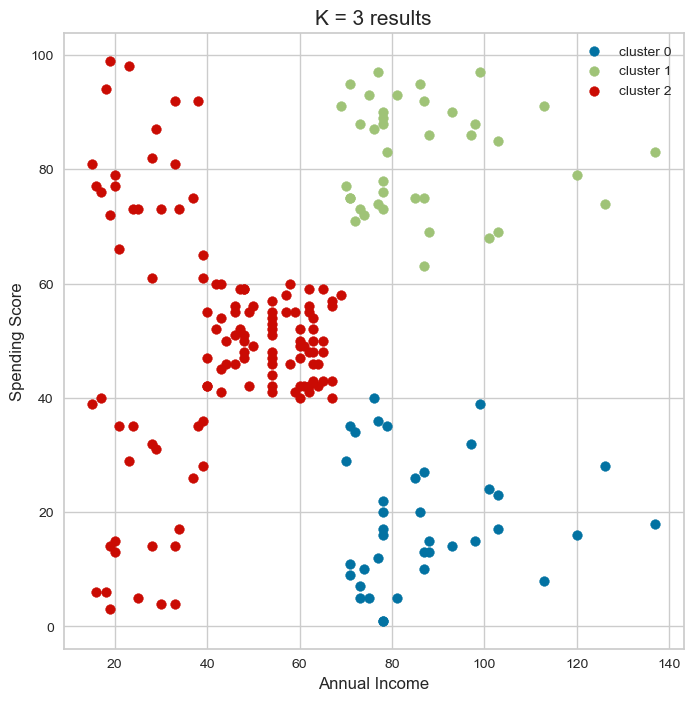

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'Annual Income (k$)'], df.loc[df['cluster'] == i, 'Spending Score (1-100)'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

### K를 결정하기 쉽게 도와주는 함수인 yellow brick 사용

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

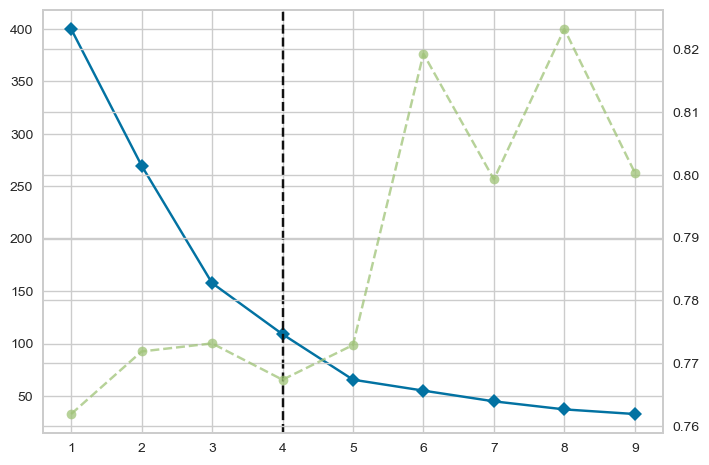

In [25]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_1)

elobw 메소드에 따라 k=4가 적절함을 알 수 있다

In [27]:
k_means = KMeans(n_clusters = 4).fit(data_1)
data['k=4'] = k_means.labels_  

data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,k=4
CustomerID,,,,,,
1,19,15,39,0.0,1.0,2
2,21,15,81,0.0,1.0,3
3,20,16,6,1.0,0.0,2
4,23,16,77,1.0,0.0,3
5,31,17,40,1.0,0.0,2
...,...,...,...,...,...,...
196,35,120,79,1.0,0.0,1
197,45,126,28,1.0,0.0,0
198,32,126,74,0.0,1.0,1


## 3. Evaluation

In [28]:
# data 속 모든 개별 데이터에 대해 Silhouette 계수 구하기

score_samples_1 = silhouette_samples(data, data['k=4'])

In [29]:
# data에 Silhouette 계수 column 추가

data['silhouette_coef_k=4'] = score_samples_1

In [30]:
# 모든 데이터의 평균 Silhouette 계수 구하기 

average_score_1 = silhouette_score(data, data['k=4'])

In [31]:
# 결과 확인

print('K = 4일 때 평균 Silhouette 계수: {0:.3f}'.format(average_score_1))


K = 4일 때 평균 Silhouette 계수: 0.393


In [32]:
# 군집별 평균 Silhouette 계수 구하기

print(data.groupby('k=4')['silhouette_coef_k=4'].mean())
print()

k=4
0    0.476204
1    0.554180
2    0.466569
3    0.280865
Name: silhouette_coef_k=4, dtype: float64

